In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import time
import functools
from collections import Counter
#from nxviz import MatrixPlot
from datetime import datetime 
import pickle
from NetDistr import NetDistr
from os import listdir
from os.path import isfile, join
import os


In [ ]:
def bounds_arrs(arrs:dict)->int:
    vals = [[max(i), min(i)] for i in arrs.values()]
    vals = np.array(vals).flatten()
    l_val = np.ceil(min(vals))
    u_val = np.ceil(max(vals))
    return l_val, u_val


def bounds_arrs_deg(d_of_dicts:dict,degree:bool)->int:
    # to get d_of_counters
    d_of_dicts = d_of_dicts.values()
    combined_dict = {k: v for d in d_of_dicts for k, v in d.items()}
    if degree:
        vals = combined_dict.keys()
    else:
        vals = combined_dict.values()        
    l_val = min(vals)
    u_val = max(vals)
    return l_val, u_val
    
def range_dicts(d_of_dicts1:dict, d_of_dicts2:dict, degree:bool)->int:
    l_val1, u_val1 = bounds_arrs_deg(d_of_dicts1, degree)
    l_val2, u_val2 = bounds_arrs_deg(d_of_dicts2, degree)
    lims = [l_val1, u_val1] + [l_val2, u_val2]
    ub = max(lims)
    lb = min (lims)
    return lb, ub


In [74]:
def plot_dists(times:list, path:str, dist1_fhandle:str, dist2_fhandle:str, dist2_lab:str, save_handel:str, save_fig:bool):
    file_names = ['dir_net','undir_net_inphase','undir_net_antiphase']
    for i, val in enumerate(['Pc2','Pc3']):
        for j, f in enumerate(file_names):
            net_type = f'{f}{i}'
            fname1 =f'{net_type}{dist1_fhandle}'
            fname2 = f'{net_type}{dist2_fhandle}'
            dist1 = NetDistr(f'{path}/{fname1}', 128)
            dist2 = NetDistr(f'{path}/{fname2}', 128)
            print('dist1 name', fname1)
            print('dist2 name', fname2)

            if dist2.num_edges<10:
                print('not enough edges in d2')
                continue
            
            if j ==0:
                power_dist = dist1.pc_power('networks_data/ulf_spd_2015.csv', times, i)
                lb1, ub1 = bounds_arrs(power_dist)
                power_bins = np.linspace(lb1,ub1,30)

            deg_dist1 =  dist1.t_snapshot_dist(times)
            deg_dist2 =  dist2.t_snapshot_dist(times)
            lbx, ubx = range_dicts(deg_dist1, deg_dist2, degree=True)
            lby, uby = range_dicts(deg_dist1, deg_dist2, degree=False)


            fig, ax = plt.subplots(nrows=2,ncols=len(times), facecolor='w', edgecolor='k',figsize=(15,8))
            fig.suptitle(" ".join(net_type.split('_')[0:3]))
            for ind, (t1, t2) in enumerate(zip(deg_dist1.keys(), deg_dist2.keys())):
                if t1!=t2:
                    ax[1,ind].bar(deg_dist1[t1].keys(),deg_dist1[t1].values(), width=1.0 )
                else:
                    ax[1,ind].bar(deg_dist2[t2].keys(),deg_dist2[t2].values(), width=1.0, label=f'{dist2_lab}')
                    ax[1,ind].bar(deg_dist1[t2].keys(),deg_dist1[t2].values(), width=1.0,
                                 label=f'analysis')
                ax[1,ind].set_xlim(lbx,ubx)
                ax[1,ind].set_ylim(lby,uby)
                t = t1.split(' ')[1]
                ax[0,ind].set_title(f'{t} {val}')
                ax[0,ind].hist(power_dist[t1], bins=power_bins, edgecolor="red")
                ax[0,ind].set_xlabel('log(nT^2)')
                #power ylim
                ax[0,ind].set_ylim(0,13)
                pre_onset_t = list(power_dist.keys())[0]
                pre_onset_p = np.nanmean(power_dist[pre_onset_t])
                ax[0,ind].axvline(pre_onset_p, c='r', ls='--',
                    label=f'pre onset avg power \n labs {np.round(pre_onset_p,2)} log(nT^2)')
                ax[0,0].legend()
                ax[1,ind].set_xlabel('degree')
            ax[0,0].set_ylabel('freq')
            ax[1,0].set_ylabel('freq')
            ax[1,0].legend()

            if save_fig:
                plt.savefig(f'{s_path}dist_{net_type}_{save_handel}.png')
            plt.show()

dist1 name dir_net0_e_128_0.4_0.25_2.5_2015.txt
dist2 name dir_net0_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt


No handles with labels found to put in legend.


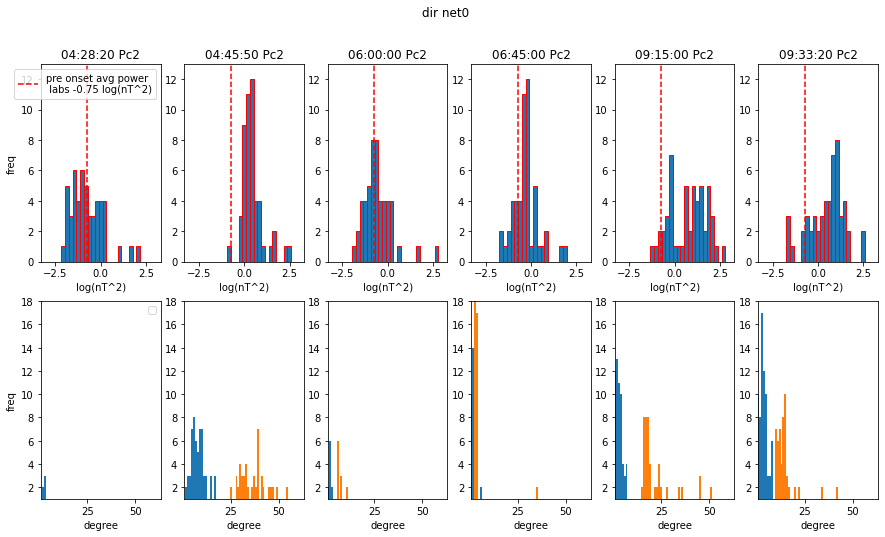

dist1 name undir_net_inphase0_e_128_0.4_0.25_2.5_2015.txt
dist2 name undir_net_inphase0_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt


No handles with labels found to put in legend.


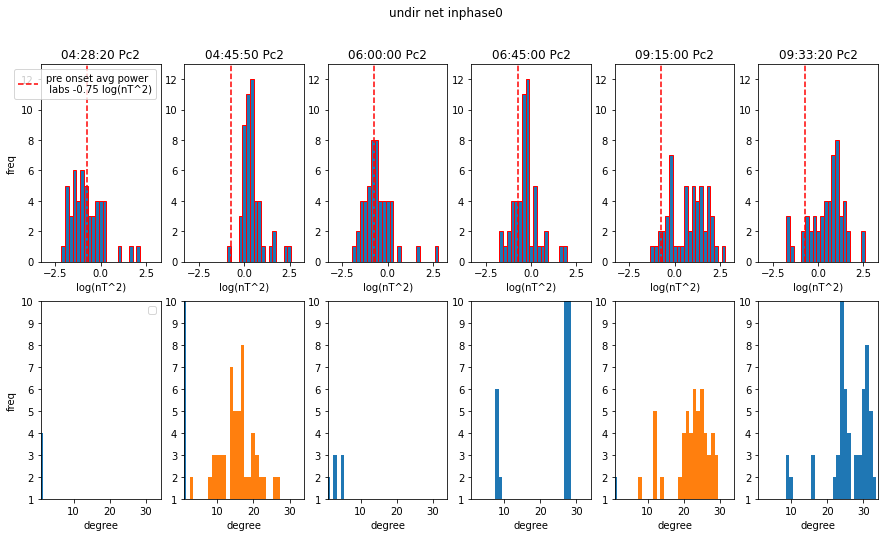

dist1 name undir_net_antiphase0_e_128_0.4_0.25_2.5_2015.txt
dist2 name undir_net_antiphase0_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt


No handles with labels found to put in legend.


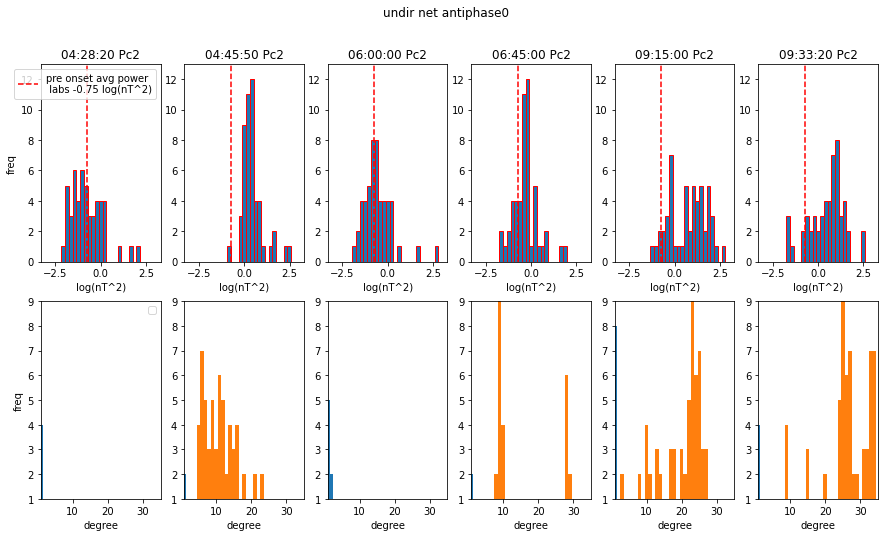

dist1 name dir_net1_e_128_0.4_0.25_2.5_2015.txt
dist2 name dir_net1_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt
not enough edges in d2
dist1 name undir_net_inphase1_e_128_0.4_0.25_2.5_2015.txt
dist2 name undir_net_inphase1_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt
not enough edges in d2
dist1 name undir_net_antiphase1_e_128_0.4_0.25_2.5_2015.txt
dist2 name undir_net_antiphase1_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt
not enough edges in d2


In [84]:
year = 2015
comp = 'e'
s_path = f'/Users/sc/conda_envs/geomag/plots/{year}_nets/comp_{comp}/'
path_exists = os.path.exists(s_path)
if not path_exists:
    os.makedirs(s_path)
    print(f'The new directory {s_path} is created!')
        
times = ['04:28:20', '04:45:50', '06:00:00','06:45:00','09:15:00','09:33:00' ]
# create a function to plot all histograms for given snapshots
path ='networks_data/2015_nets/comp_e'
# remember .txt in file_handel
file_handel1 = '_e_128_0.4_0.25_2.5_2015.txt'
# file_handel2 = '_e_128_pc2_pc3_0.025_0.25_2015.txt'
# save_h = '0.25_2.5_0.025_0.25'
# legend_lab_dist2 = 'low power threshold'
file_handel2 = '_surrogate_s_wf_e_128_0.4_0.25_2.5_2015.txt'
save_h = '0.25_2.5_surrogate_s_wf'
legend_lab_dist2 = 'surrogate_s_wf'
# file_handel2 = '_surrogate_e_128_pc2_pc3_0.25_2.5_2015.txt'
plot_dists(times, path, file_handel1, file_handel2, legend_lab_dist2, save_h, save_fig=True,)


In [ ]:
# power_dist = dist1.pc_power('networks_data/ulf_spd_2015.csv', times, i)
# file_names = ['dir_net']
# for i, val in enumerate(['Pc2']):
#     for j, f in enumerate(file_names):
#         net_type = f'{f}{i}'
#         fname1 =f'{net_type}{file_handel1}'
#         fname2 = f'{net_type}{file_handel2}'
#         dist1 = NetDistr(f'{path}/{fname1}', 128)
#         dist2 = NetDistr(f'{path}/{fname2}', 128)
#         power_dist = dist1.pc_power('networks_data/ulf_spd_2015.csv', times, i)

In [ ]:
# deg_dist1 =  dist1.t_snapshot_dist(times)
# lb1, ub1 = bounds_arrs_deg(deg_dist1)
# lb1, ub1 = bounds_arrs_deg2(deg_dist1, degree=False)
# print(power_dist)
# # lb1, ub1 = bounds_arrs(power_dist)
